In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df_index  = pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [35]:
#Drop Uncessary Columns

df_index.drop(columns = ["Unnamed: 0", "year", "month"], axis = 1, inplace = True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [36]:
#Check for null values 

df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

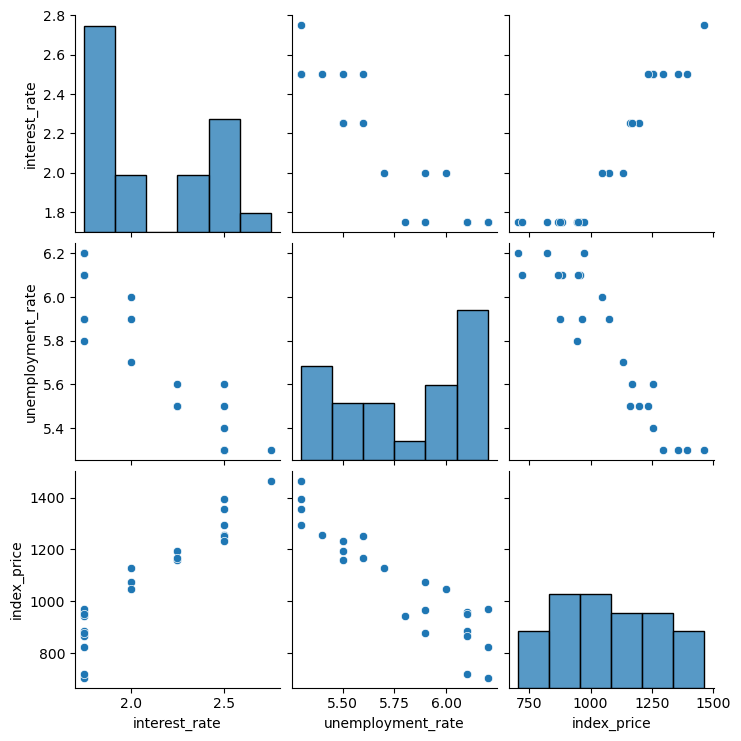

In [37]:
#Visualisation

import seaborn as sns

sns.pairplot(df_index)

In [38]:
#Check Correlation

df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [39]:
#Independent and Dependent Features

X = df_index.iloc[:,:-1]
y = df_index.iloc[:,-1]

In [40]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [41]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [42]:
X_train.shape

(18, 2)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

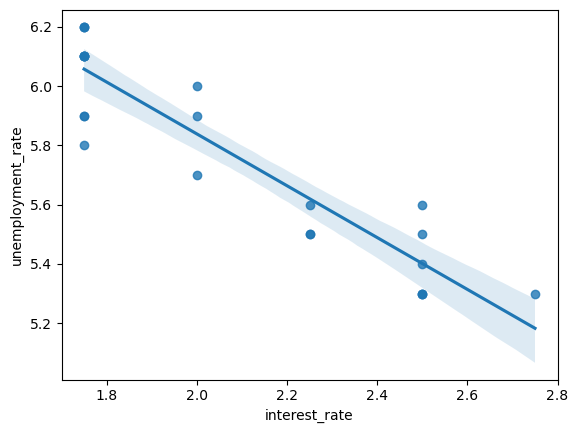

In [46]:
sns.regplot(x = df_index["interest_rate"], y = df_index["unemployment_rate"])

In [47]:
#Standardising 

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [48]:
#Applying regression

from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train, y_train)

LinearRegression()

In [51]:
#Cross Validation

from sklearn.model_selection import cross_val_score

validation = cross_val_score(regression, X_train, y_train, scoring = "neg_mean_squared_error", cv = 3)
np.mean(validation)

-5914.8281801623925

In [53]:
#prediction

y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [54]:
#Peformance Metric 

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323554
76.11677139574813


In [55]:
#R square 

from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score

0.8278978091457142

In [59]:
#Adjusted R2

print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.713163015242857


## Assumptions

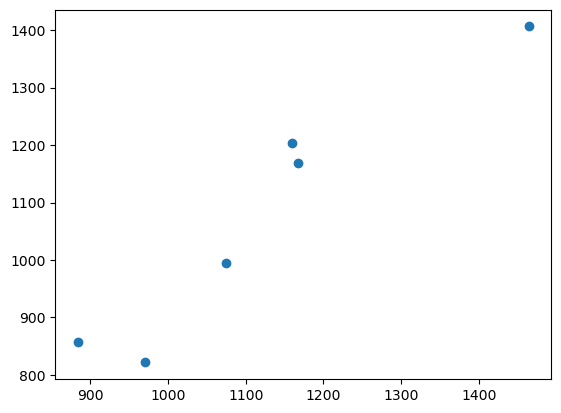

In [60]:
plt.scatter(y_test, y_pred)

In [62]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


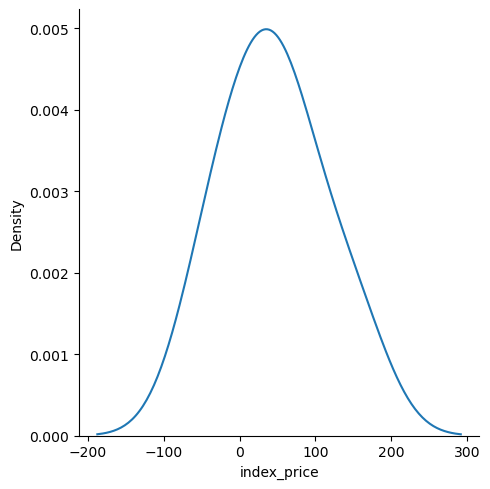

In [63]:
sns.displot(residuals, kind = "kde")

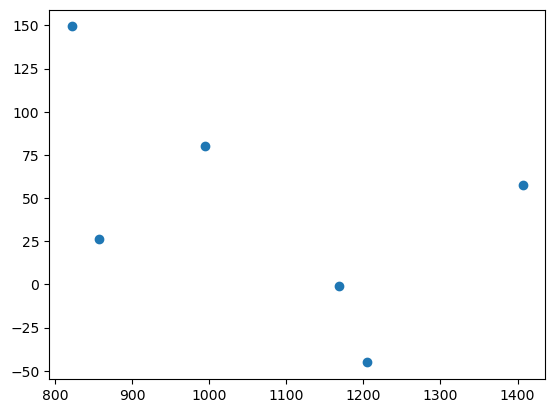

In [64]:
plt.scatter(y_pred, residuals)

In [65]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()

In [66]:
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 20 Dec 2025   Prob (F-statistic):                       0.754
Time:                        10:53:43   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [69]:
print(regression.predict(scalar.transform([[2.75, 5.3]])))

[1406.51300368]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
